In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl


# Linear Combination of Vector

The Linear algebra is built on two operation.

1. addition of two vector
2. scalar multiplication of a vector

In [8]:
#additon of vector
v = np.array([1,1])
w = np.array([2,3])
v+w

array([3, 4])

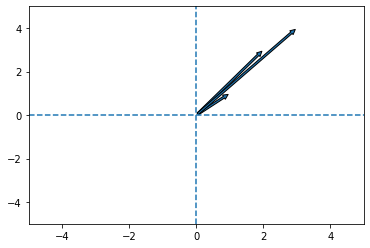

In [45]:
origin=(0,0)
fig,ax = plt.subplots(1,1)
vector_v = mpl.patches.FancyArrowPatch(origin,v,
                                    mutation_scale=10)
vector_w = mpl.patches.FancyArrowPatch(origin,w,
                                      mutation_scale=10)
vector_vw = mpl.patches.FancyArrowPatch(origin,v+w,
                                        mutation_scale=10)
ax.add_patch(vector_v)
ax.add_patch(vector_w)
ax.add_patch(vector_vw)
ax.set(xlim=(-5,5),ylim=(-5,5))
ax.axvline(x =0,linestyle ="--")
ax.axhline(y=0,linestyle ="--")
plt.show()

# Elimination

To the system of equation we can use the Elimination method.

**Goal :** From Matrix A to upper triangular matrix (U).then do the process of back substitution in the U matrix .

**Steps :**

1. For the $m = n =3$ there are three equation $Ax = b$ and the three unknown $x_1,x_2,x_3$.
2. The first two  equation are $a_{11}x + .. = b_1$ and $a_{21}x + .. = b_2$
3. Multiply the first equation by $ a_{21} / a_{11}$ and subtract form the second equation : this  will eliminate the $x_1$ from the second equation.
4. The corner entry $a_{11}$ is the first pivot and the ratio $a_{21} / a_{11}$ is the first "multiplier"
5. Eliminate $x_1$ from the every remaining equation i  by subtracting $a_{i1} /a_{11}$ times  the first equation.
6. Now the last n-1 equation contain the n -1 unknowns $x_2 , ... ,x_n$ . Repeat to eliminate $x_2$
7. Elimination break down if zero apper in the pivot . Exchanign the two may save it.

In [243]:
def elimination(matrix):
    m = matrix.shape[0]
    n = matrix.shape[1]

    for col in range(0,m):
        for row in range(col + 1,m):
            ##print(row,col)

            # Find the elimination matrix
            elimination_matrix = np.identity(m)
            elimination_matrix[row][col] = -(matrix[row][col] / matrix[col][col])
            matrix = elimination_matrix.dot(matrix)


            print(elimination_matrix)
            #print(matrix)

    print(elimination_matrix)
    return elimination_matrix , matrix




In [226]:
A = np.array([[2,4,-2,2],
              [4,9,-3,8],
              [-2,-3,7,10]]
             )


In [227]:
elimination(A)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0. -1.  1.]]


(array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0., -1.,  1.]]),
 array([[ 2.,  4., -2.,  2.],
        [ 0.,  1.,  1.,  4.],
        [ 0.,  0.,  4.,  8.]]))

In [228]:
prob_1 = np.array([[2,3,1],
                   [10,9,11]])
elimination(prob_1)

[[ 1.  0.]
 [-5.  1.]]


(array([[ 1.,  0.],
        [-5.,  1.]]),
 array([[ 2.,  3.,  1.],
        [ 0., -6.,  6.]]))

In [229]:
prob_1 = np.array([[2,3,4],
                   [10,9,44]])
elimination(prob_1)

[[ 1.  0.]
 [-5.  1.]]


(array([[ 1.,  0.],
        [-5.,  1.]]),
 array([[ 2.,  3.,  4.],
        [ 0., -6., 24.]]))

# Elimination  moving to Factorization

1. From A to U we use the elimination matrix  EA = U
2. From U to A , we use the Factorization A = LU
3. L is inverse of E.
4. L is lower triangulate matrix
5. inverse of E is simply change of sign where we subtract there we need to perform the addition operation.



In [244]:
A = np.array([[2,1],
              [6,8]])

In [245]:
E ,U = elimination(A)


[[ 1.  0.]
 [-3.  1.]]
[[ 1.  0.]
 [-3.  1.]]


In [246]:
# elimination matrix
E

array([[ 1.,  0.],
       [-3.,  1.]])

In [247]:
# Upper Triangular matrix
U

array([[2., 1.],
       [0., 5.]])

In [248]:
# Lower Triangular matrix
L = np.linalg.inv(E)
L

array([[ 1., -0.],
       [ 3.,  1.]])

In [249]:
# From U we can get back to A
L.dot(U)

array([[2., 1.],
       [6., 8.]])

**Some point regarding L**
1. L is lower triangular matrix.
2. L in inverse of $E_{21}^{-1}E_{31}^{-1}E_{32}^{-1}$
3. The off diagonal entry is $l_{ij}$ to udo the subtraction.
4. in above example we can see that -3 change to +3 , Since we sub -3  so add again 3.
5. A is product of lower triangular matrix and upper triangular matrix.
6. Each multiple $l_{ij}$ directly goes into the $i,j$ position in the L . This happen when the elimination is done without row exchange.

# Permutation


A =  LU

This doesn't count the How many row exchange happen in the elimination?
**Factorization with row exchange:**
$$PA = LU$$

This is P is a permutation matrix , this will exchange the row of A Matrix such that there will be no zero in the pivot.

P = identity matrix if there is no exchange of row in A Matrix

**How many possible reordering of row in the matrix of (n * n )**

$$n!$$

## All possible of permutation matrix

* We can create the permutation matrix by reordering th row of identity matrix.
* The Permutation matrix will have **single 1's** in every row and columns

In [5]:
# if the there is no row exchange then Permutation matrix will be identity matrix
I = np.identity(3,dtype=np.int8)
np.matrix(I)

matrix([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]], dtype=int8)

In [9]:
# row 0 and 1 get changed
P10  = I.copy()
P10[[0,1]] = P10[[1,0]]
np.matrix(P10)

matrix([[0, 1, 0],
        [1, 0, 0],
        [0, 0, 1]], dtype=int8)

In [21]:
import itertools as iter
for order in iter.permutations(range(I.shape[0])):
    permutation_matrix = I.copy()
    print("order" , order)
    permutation_matrix[[0,1,2]] = permutation_matrix[list(order)]
    print("Permutation matrix\n"  , np.matrix(permutation_matrix))
    print("Inverse of that   \n",np.linalg.inv(permutation_matrix))

order (0, 1, 2)
Permutation matrix
 [[1 0 0]
 [0 1 0]
 [0 0 1]]
Inverse of that   
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
order (0, 2, 1)
Permutation matrix
 [[1 0 0]
 [0 0 1]
 [0 1 0]]
Inverse of that   
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
order (1, 0, 2)
Permutation matrix
 [[0 1 0]
 [1 0 0]
 [0 0 1]]
Inverse of that   
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
order (1, 2, 0)
Permutation matrix
 [[0 1 0]
 [0 0 1]
 [1 0 0]]
Inverse of that   
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
order (2, 0, 1)
Permutation matrix
 [[0 0 1]
 [1 0 0]
 [0 1 0]]
Inverse of that   
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
order (2, 1, 0)
Permutation matrix
 [[0 0 1]
 [0 1 0]
 [1 0 0]]
Inverse of that   
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


**Important of Permutation matrix:**
1. $P^{-1}$ is also the permutation matrix
2. $P^{-1}$ is always same as the transpose $P^{\intercal}$

# Space

* $R^n$ contain all the column vector with $n$ real component(dimension)
* $M$ (2 by 2 matrix) and $F$ (function) and $Z$ (zero vector alone) are the vector space.
* the subspace contain the $v$ and $w$ vector then that subspace must contain all their liner combination of those vector $cv+dw$
* **all subspace passes through the origin** because we want multiple with zero vector.
* The combination of all column a $A$ form the column space $C(A)$ .
* $Ax = b$ has the solution only if the $b$ lies on the column space of A $C(A)$
    * $C(A) = $ all combination of the columns = all vectors $Ax$

# Null Space

* The null space $N(A)$ consists of all solutions to $Ax = 0$
* So the **null space is a subspace** of $R^n$ which is similar to column space $C(A)$ is subspace of $R^n$


**What is Reduced row echelon form (R)?**
$$reff(A)$$

* When the R matrix has 1's in the all the pivot position and zero above and below that pivot.


This give rise to two variable in the R matrix

* pivot column : The which hav the pivot variable.The row that start with the 1's in the R matrix.
* free column : the column which does don't have the pivot variable.

<img src="image/img.png">

* col1, col2 , col4 are have the pivot variable
* If you take only the pivot column , it looks the identity matrix.
* #of pivot column(r) is rank of the A matrix(m*n).
* for the number of free column n-r , col3 and col5 are the free columns.


The number of free column is equal to number of special solution.







<img src="image\img_1.png">

In [24]:
from sympy import *

A = np.array([[1,2,2,2],
              [2,4,6,8],
              [3,6,8,10]])

Matrix(A).rref()

(Matrix([
 [1, 2, 0, -2],
 [0, 0, 1,  2],
 [0, 0, 0,  0]]),
 (0, 2))

<img src="image\img_2.png">

In [2]:
from scipy import linalg
import numpy as np

In [3]:
rng = np.random.default_rng()
a = rng.standard_normal((9,6))